In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "liguria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,7,Liguria,1,0,1,0,1,1,1,...,0.0,38.0,0.0,0.0,0.00,100.00,2.63,0.00,0.00,0.00
1,2020-02-26T18:00:00,7,Liguria,6,0,6,5,11,10,10,...,0.0,27.0,0.0,5.0,0.00,54.55,37.04,0.00,0.00,1000.00
2,2020-02-27T18:00:00,7,Liguria,9,0,9,10,19,8,8,...,0.0,12.0,0.0,5.0,0.00,47.37,66.67,0.00,0.00,72.73
3,2020-02-28T18:00:00,7,Liguria,9,0,9,10,19,0,0,...,0.0,34.0,0.0,0.0,0.00,47.37,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,7,Liguria,4,1,5,33,38,19,23,...,0.0,9.0,0.0,23.0,20.00,13.16,255.56,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2020-12-14T17:00:00,7,Liguria,780,73,853,7427,8280,-115,223,...,17.0,2533.0,1106.0,-125.0,8.56,10.30,8.80,20.16,-2.67,-1.37
294,2020-12-15T17:00:00,7,Liguria,768,71,839,7276,8115,-165,202,...,20.0,3899.0,1012.0,-151.0,8.46,10.34,5.18,19.96,-2.74,-1.99
295,2020-12-16T17:00:00,7,Liguria,755,71,826,7203,8029,-86,275,...,11.0,4672.0,1131.0,-73.0,8.60,10.29,5.89,24.31,0.00,-1.06
296,2020-12-17T17:00:00,7,Liguria,746,69,815,6814,7629,-400,416,...,19.0,4333.0,1466.0,-389.0,8.47,10.68,9.60,28.38,-2.82,-4.98


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 287
Nuovi tamponi: 3768.0
Percentuale nuovi positivi/nuovi tamponi: 7.6 %
Nuovi guariti: 420.0
Nuovi deceduti: 30.0
Variazione positivi ricoverati con sintomi: -30.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -134.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-19T17:00:00,7,Liguria,436,34,470,3441,3911,152,323,...,5.0,1871.0,922.0,123.0,7.23,12.02,17.26,35.03,-12.82,4.04
1,2020-10-20T17:00:00,7,Liguria,505,32,537,3947,4484,573,907,...,6.0,6062.0,3199.0,506.0,5.96,11.98,14.96,28.35,-5.88,14.65
2,2020-10-21T17:00:00,7,Liguria,547,31,578,4043,4621,137,546,...,9.0,4950.0,2096.0,96.0,5.36,12.51,11.03,26.05,-3.12,3.06
3,2020-10-22T17:00:00,7,Liguria,540,34,574,4492,5066,445,690,...,17.0,5039.0,2200.0,449.0,5.92,11.33,13.69,31.36,9.68,9.63
4,2020-10-23T17:00:00,7,Liguria,598,33,631,4838,5469,403,778,...,7.0,5096.0,2186.0,346.0,5.23,11.54,15.27,35.59,-2.94,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-14T17:00:00,7,Liguria,780,73,853,7427,8280,-115,223,...,17.0,2533.0,1106.0,-125.0,8.56,10.30,8.80,20.16,-2.67,-1.37
57,2020-12-15T17:00:00,7,Liguria,768,71,839,7276,8115,-165,202,...,20.0,3899.0,1012.0,-151.0,8.46,10.34,5.18,19.96,-2.74,-1.99
58,2020-12-16T17:00:00,7,Liguria,755,71,826,7203,8029,-86,275,...,11.0,4672.0,1131.0,-73.0,8.60,10.29,5.89,24.31,0.00,-1.06
59,2020-12-17T17:00:00,7,Liguria,746,69,815,6814,7629,-400,416,...,19.0,4333.0,1466.0,-389.0,8.47,10.68,9.60,28.38,-2.82,-4.98


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

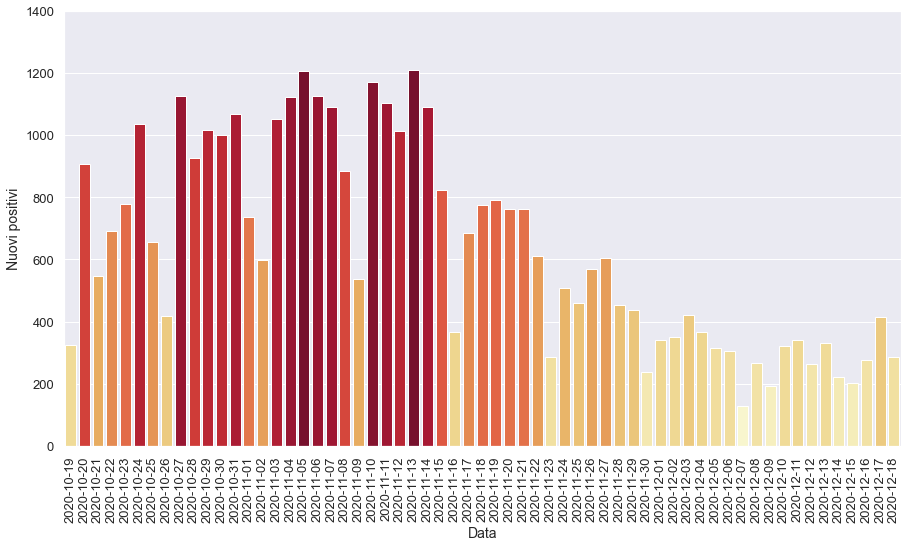

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

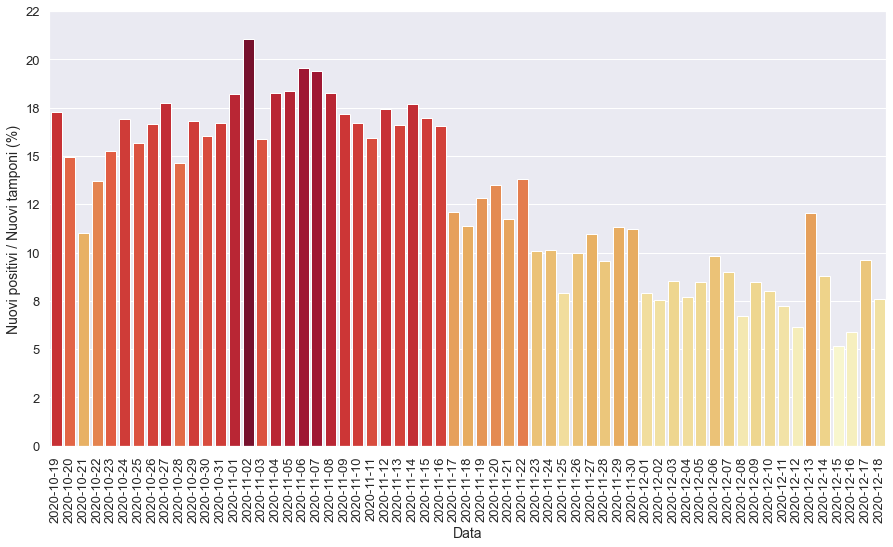

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

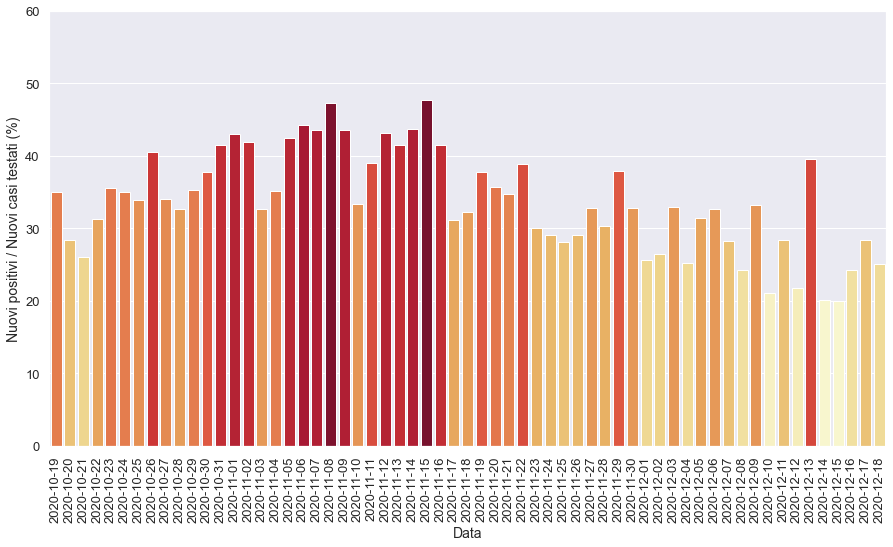

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

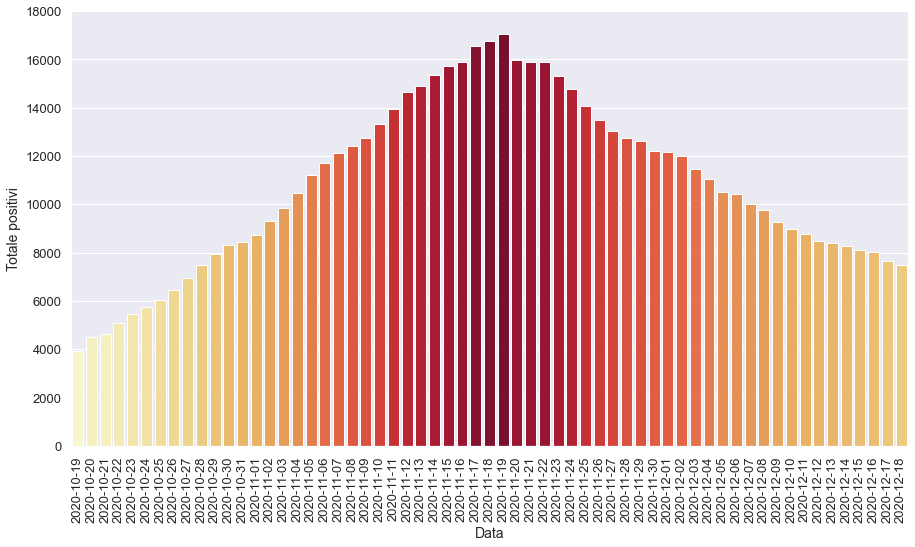

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

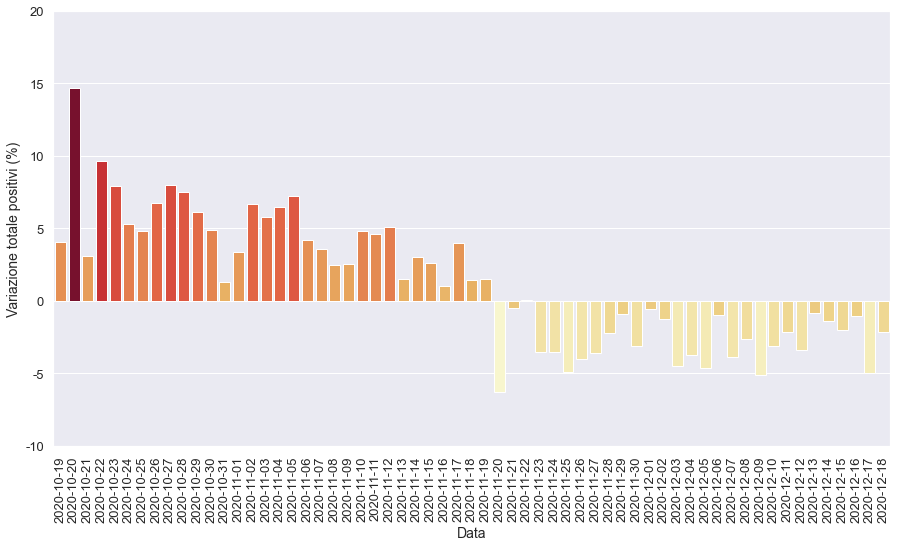

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

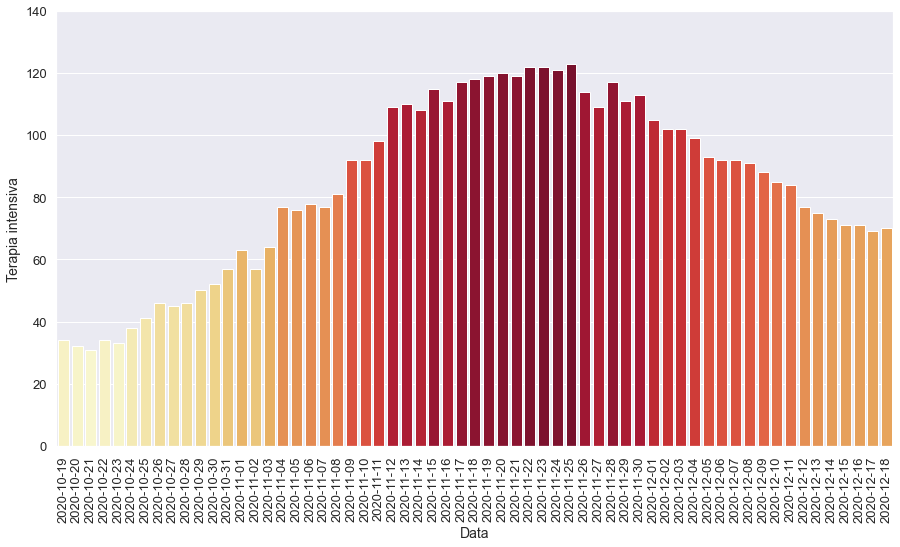

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

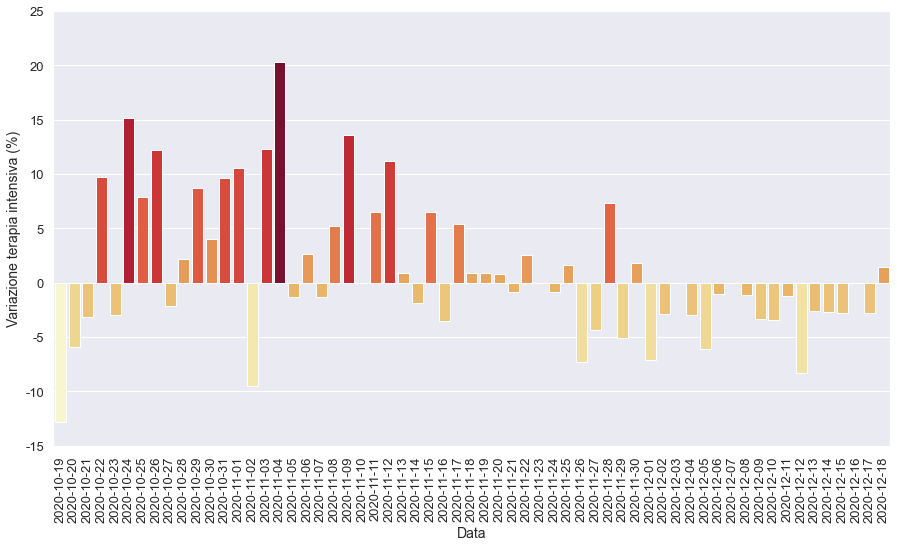

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

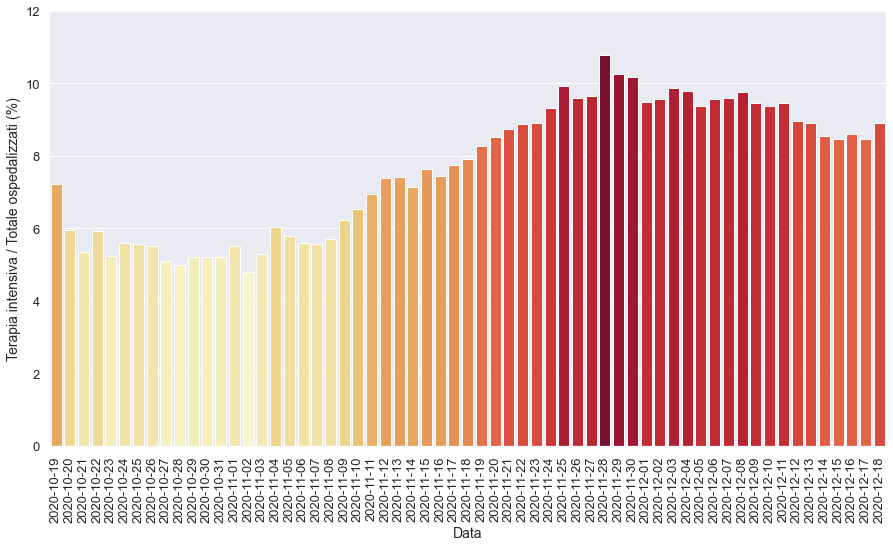

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

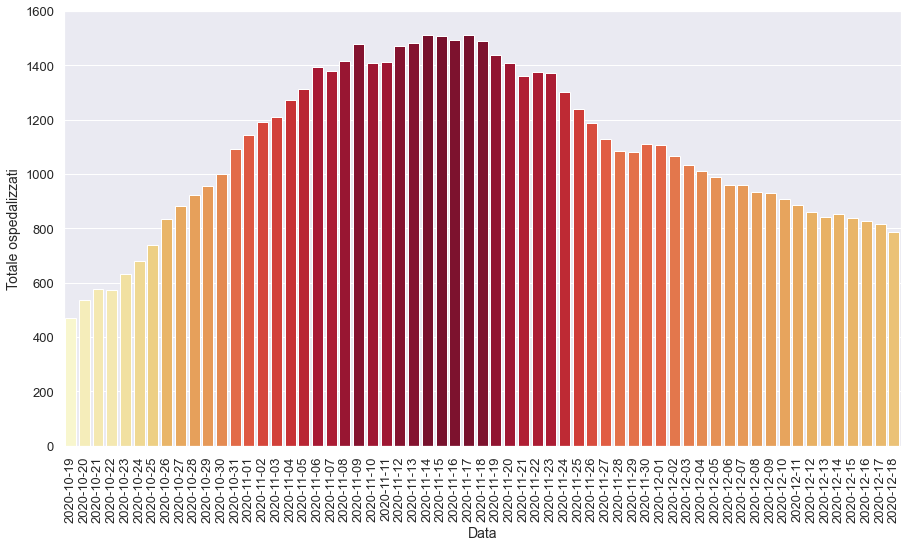

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

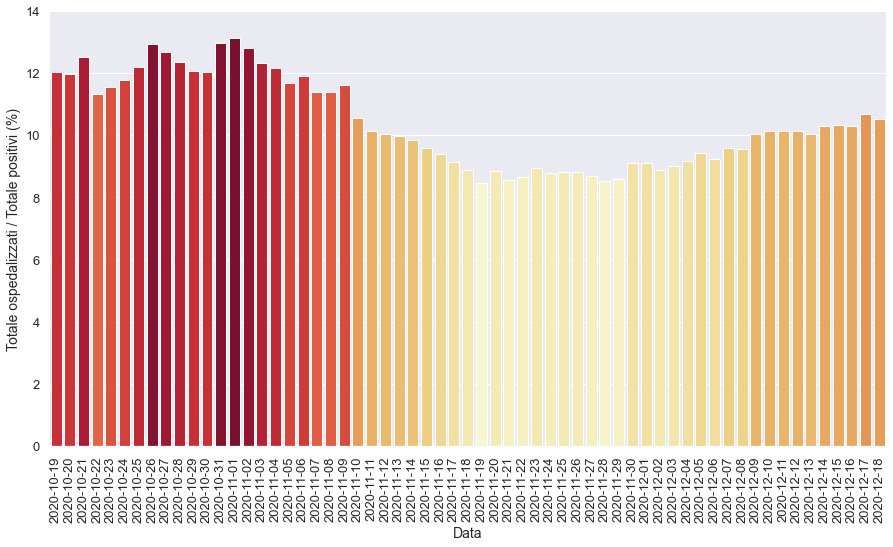

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

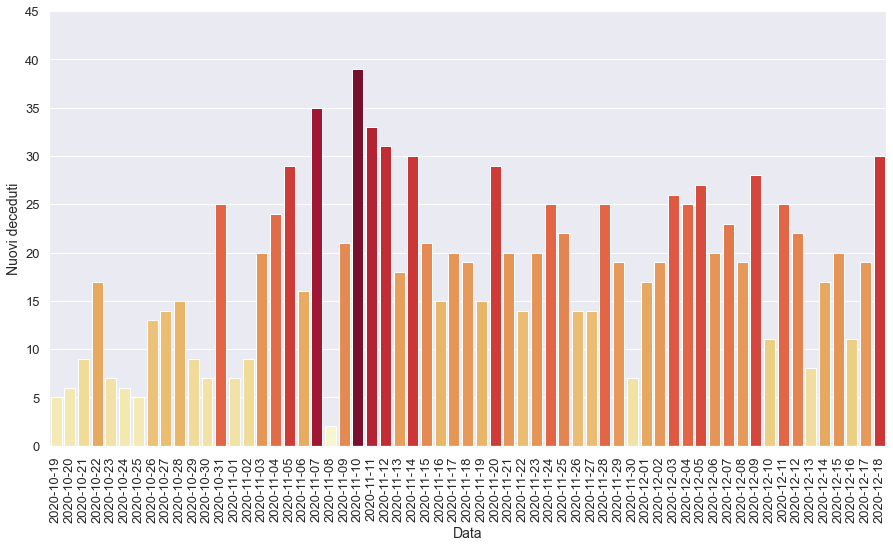

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

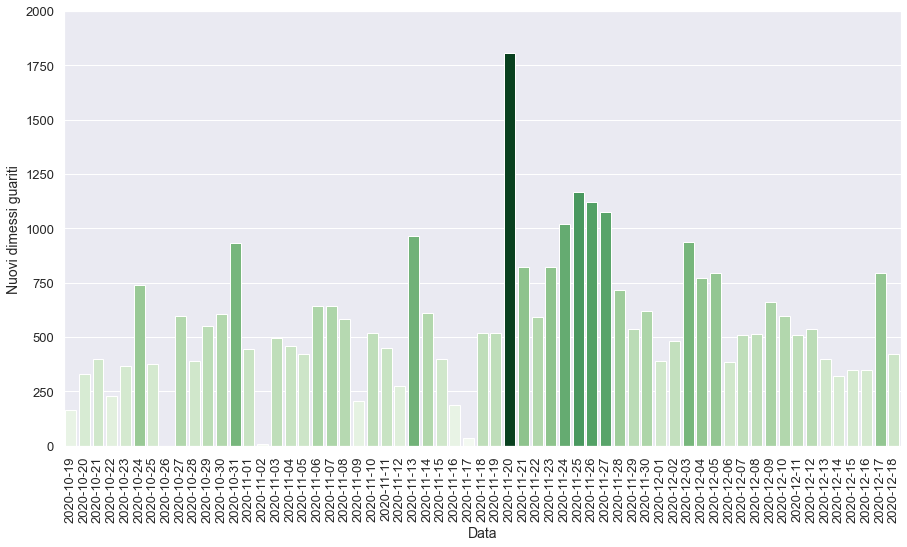

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-18T17:00:00,7,Liguria,1371,118,1489,15279,16768,237,775,...,19.0,6806.0,2402.0,258.0,7.92,8.88,11.39,32.26,0.85,1.43
1,2020-11-19T17:00:00,7,Liguria,1319,119,1438,15589,17027,259,792,...,15.0,6187.0,2098.0,310.0,8.28,8.45,12.80,37.75,0.85,1.54
2,2020-11-20T17:00:00,7,Liguria,1290,120,1410,14544,15954,-1073,761,...,29.0,5647.0,2131.0,-1045.0,8.51,8.84,13.48,35.71,0.84,-6.30
3,2020-11-21T17:00:00,7,Liguria,1241,119,1360,14513,15873,-81,761,...,20.0,6476.0,2191.0,-31.0,8.75,8.57,11.75,34.73,-0.83,-0.51
4,2020-11-22T17:00:00,7,Liguria,1253,122,1375,14503,15878,5,611,...,14.0,4428.0,1571.0,-10.0,8.87,8.66,13.80,38.89,2.52,0.03
5,2020-11-23T17:00:00,7,Liguria,1248,122,1370,13951,15321,-557,285,...,20.0,2831.0,949.0,-552.0,8.91,8.94,10.07,30.03,0.00,-3.51
6,2020-11-24T17:00:00,7,Liguria,1179,121,1300,13483,14783,-538,509,...,25.0,5021.0,1752.0,-468.0,9.31,8.79,10.14,29.05,-0.82,-3.51
7,2020-11-25T17:00:00,7,Liguria,1115,123,1238,12817,14055,-728,460,...,22.0,5831.0,1634.0,-666.0,9.94,8.81,7.89,28.15,1.65,-4.92
8,2020-11-26T17:00:00,7,Liguria,1075,114,1189,12303,13492,-563,570,...,14.0,5705.0,1959.0,-514.0,9.59,8.81,9.99,29.10,-7.32,-4.01
9,2020-11-27T17:00:00,7,Liguria,1019,109,1128,11883,13011,-481,606,...,14.0,5532.0,1850.0,-420.0,9.66,8.67,10.95,32.76,-4.39,-3.57


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

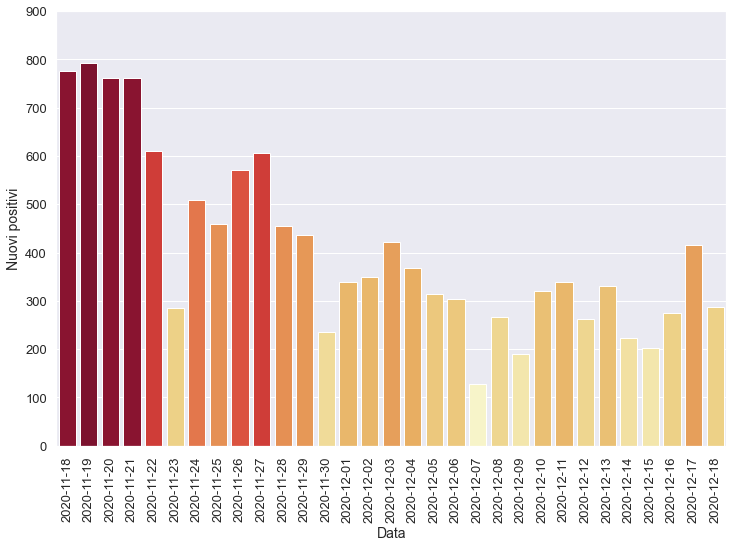

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

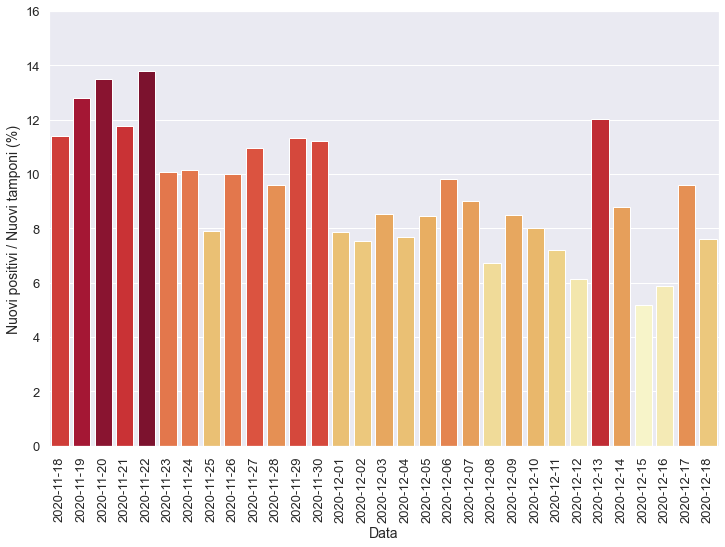

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

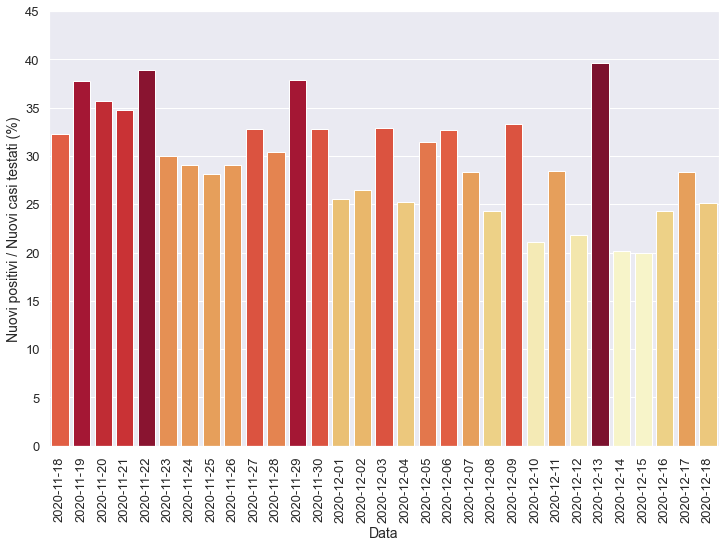

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

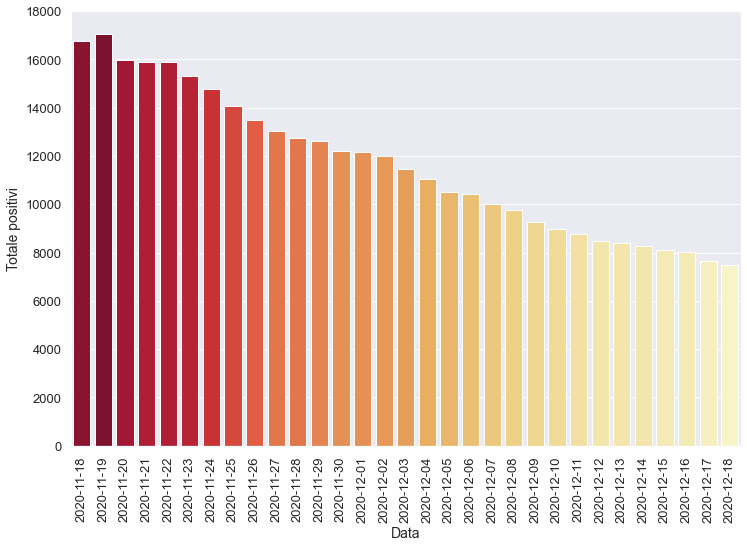

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

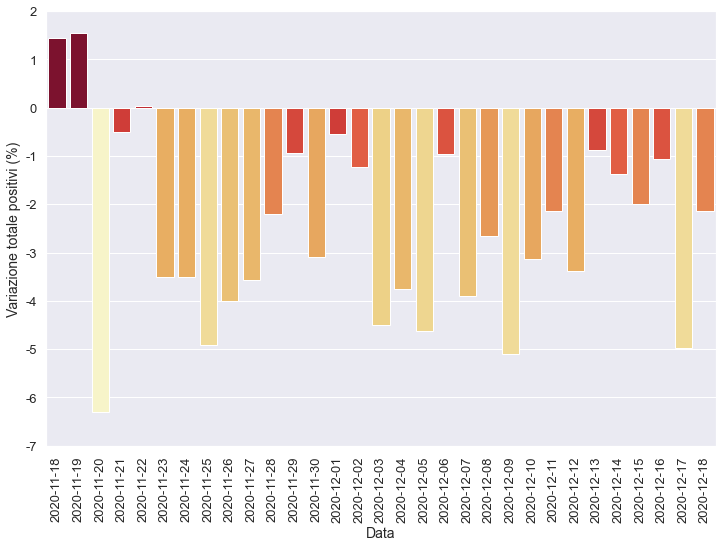

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

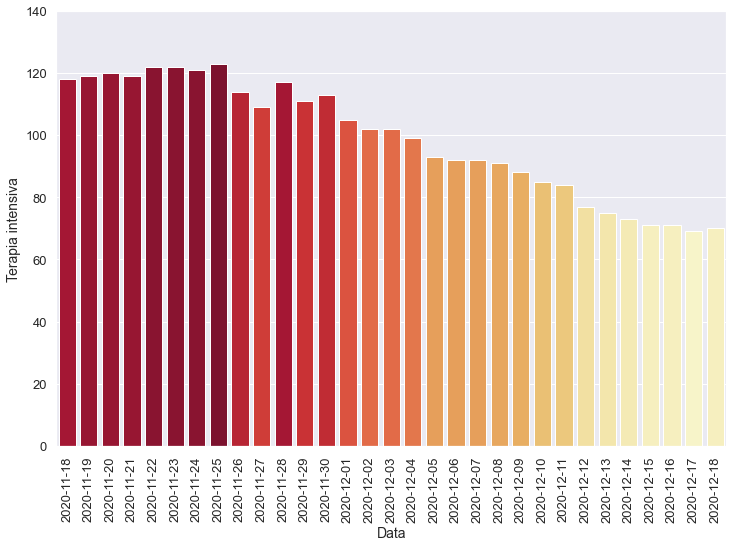

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

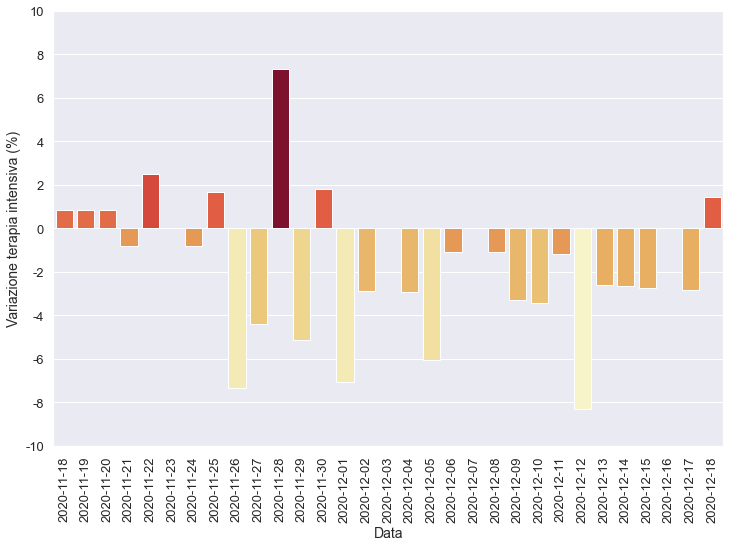

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

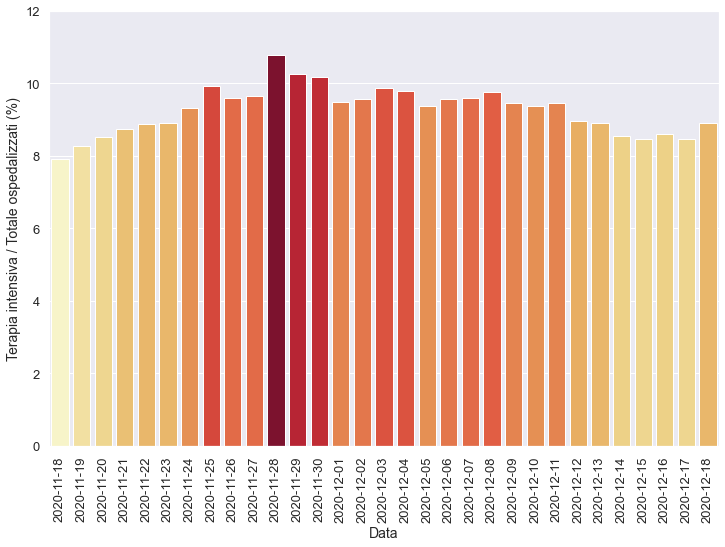

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

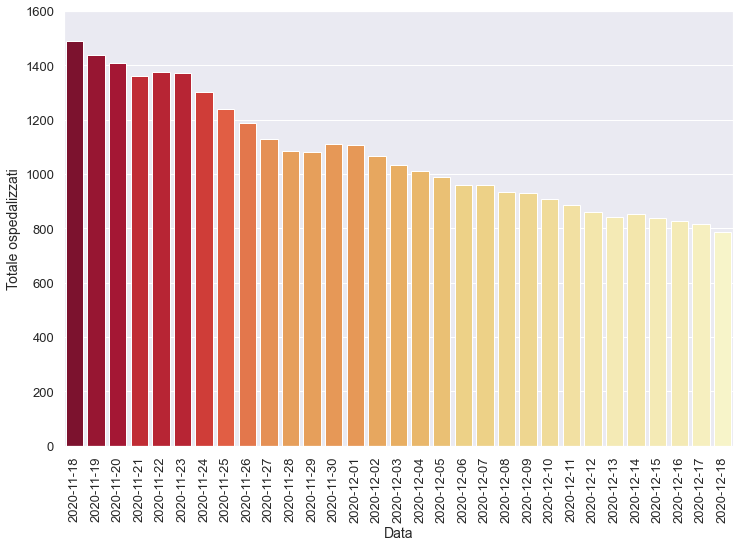

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

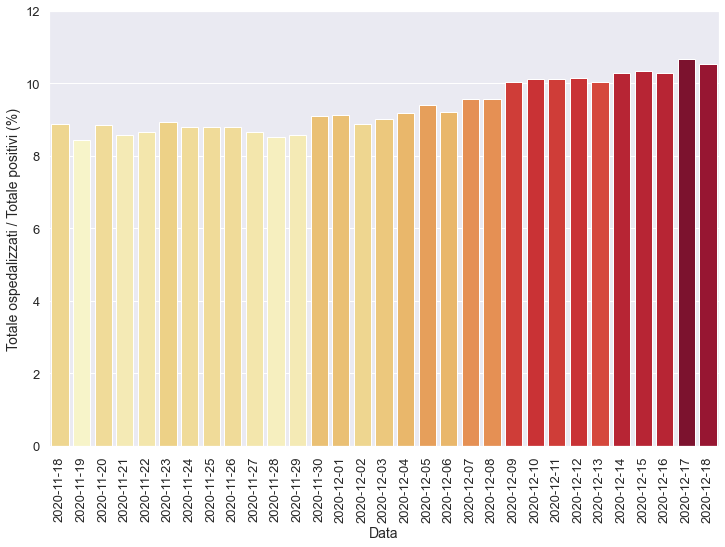

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

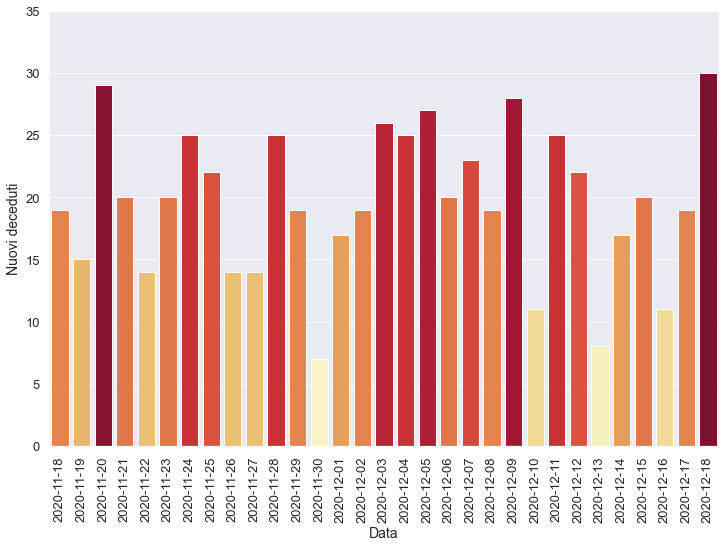

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

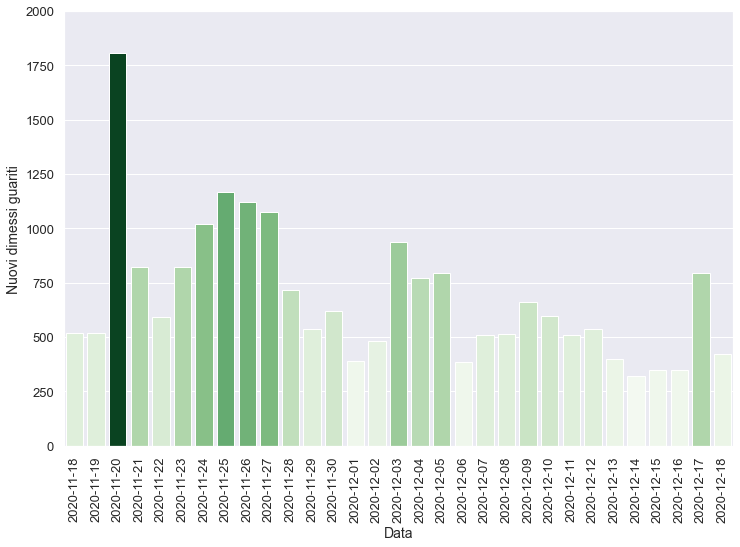

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-11T17:00:00,7,Liguria,803,84,887,7878,8765,-193,340,...,25.0,4707.0,1197.0,-173.0,9.47,10.12,7.22,28.40,-1.18,-2.15
1,2020-12-12T17:00:00,7,Liguria,782,77,859,7610,8469,-296,263,...,22.0,4277.0,1204.0,-268.0,8.96,10.14,6.15,21.84,-8.33,-3.38
2,2020-12-13T17:00:00,7,Liguria,768,75,843,7552,8395,-74,331,...,8.0,2752.0,836.0,-58.0,8.90,10.04,12.03,39.59,-2.60,-0.87
3,2020-12-14T17:00:00,7,Liguria,780,73,853,7427,8280,-115,223,...,17.0,2533.0,1106.0,-125.0,8.56,10.30,8.80,20.16,-2.67,-1.37
4,2020-12-15T17:00:00,7,Liguria,768,71,839,7276,8115,-165,202,...,20.0,3899.0,1012.0,-151.0,8.46,10.34,5.18,19.96,-2.74,-1.99
5,2020-12-16T17:00:00,7,Liguria,755,71,826,7203,8029,-86,275,...,11.0,4672.0,1131.0,-73.0,8.60,10.29,5.89,24.31,0.00,-1.06
6,2020-12-17T17:00:00,7,Liguria,746,69,815,6814,7629,-400,416,...,19.0,4333.0,1466.0,-389.0,8.47,10.68,9.60,28.38,-2.82,-4.98
7,2020-12-18T17:00:00,7,Liguria,716,70,786,6680,7466,-163,287,...,30.0,3768.0,1143.0,-134.0,8.91,10.53,7.62,25.11,1.45,-2.14


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

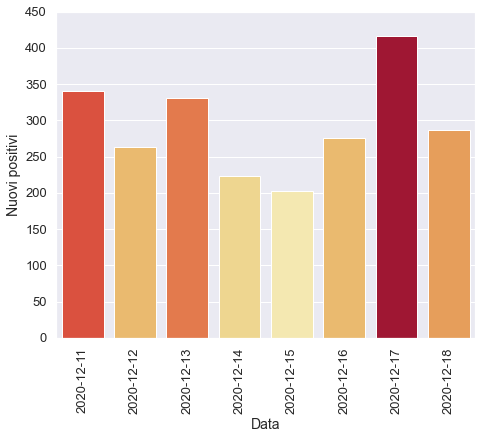

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

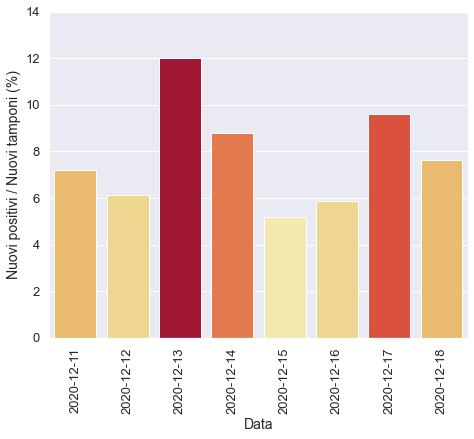

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

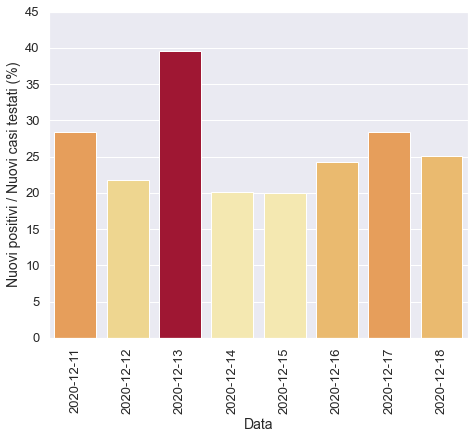

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

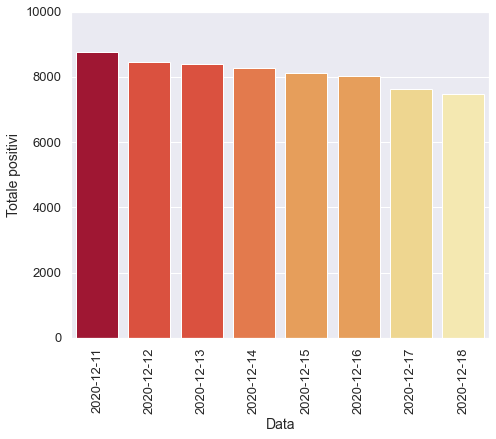

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

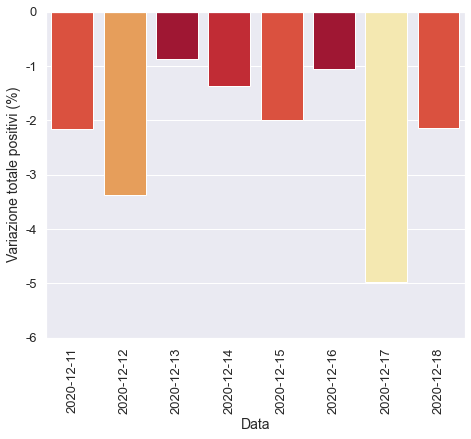

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

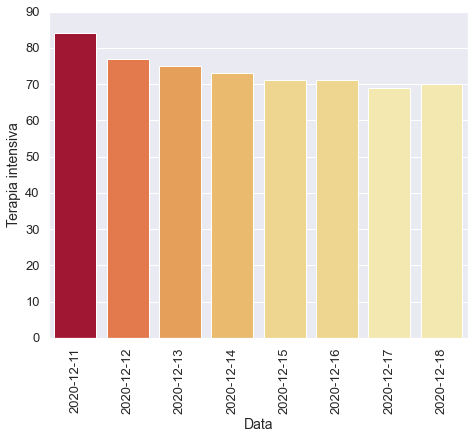

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

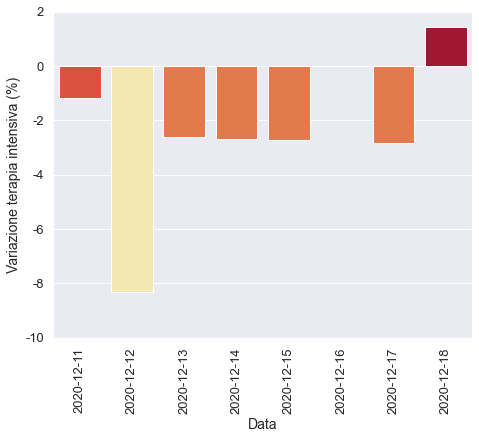

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

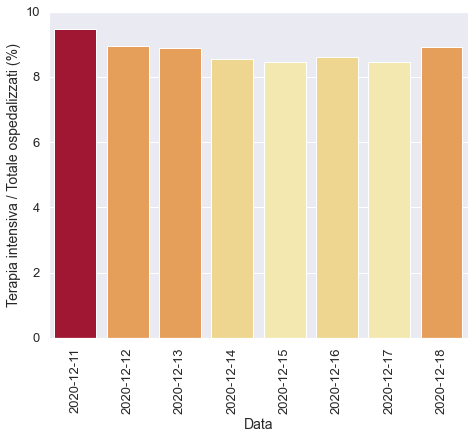

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

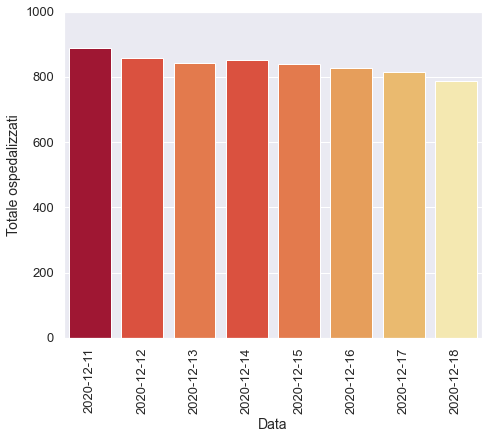

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

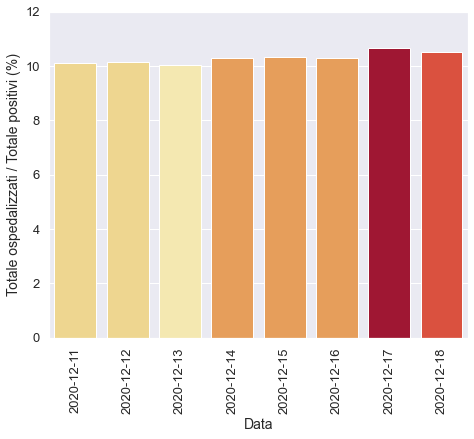

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

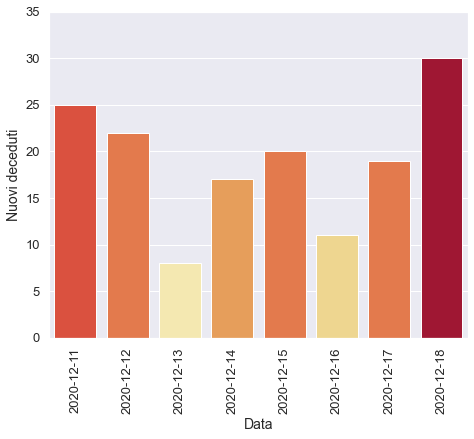

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

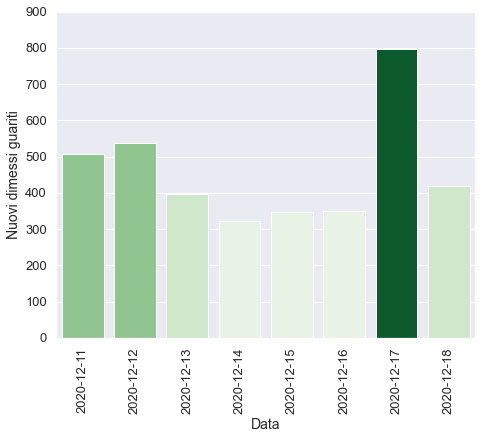

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)